# Matplotlib

## What is matplotlib?

- Matplotlib is a plotting library for Python
  - Claim: “make the easy things easy and the hard things possible”.
- Capable of:
  - Interactive and non-interactive plotting
  - Producing publication-quality figures
  - Can be used for schematic diagrams  
-  Closely integrated with numpy
  - Use `numpy` functions for reading data
  - `matplotlib` can plot numpy arrays easily
- See
  - http://matplotlib.org/

## What does it do?

- People often want to have a quick look at data
  - And perhaps manipulate it
- Large amount of functionality:
  - Line charts, bar charts, scatter plots, error bars, etc..
  - Heatmaps, contours, surfaces
  - Geographical and map-based plotting
- Can be used
  - Via a standalone script (automatiion of plotting tasks)
  - Via ipython shell
  - Within a note book
- All methods allow you to save your work


## Basic concepts

<img src="figuremap.png" style="width: 30%">

- Everything is assembled by Python commands
- Create a figure with an axes area (this is the plotting area)
- Can create one or more plots in a figure
- Only one plot (or axes) is active at a given time
- Use `show()` to display the plot

`matplotlib.pyplot` contains the high-level functions we need to do all the above and more

## Basic plotting

Import numpy (alias np) and matplotlib's plotting functionality via the pyplot interface (alias plt)

```python
import numpy as np
import matplotlib.pyplot as plt
```


In [1]:
# If using a notebook, plots can be forced to appear in the browser
# by adding the "inline" option

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create some data points for y = cos(x) using numpy

# defining x-array
xmin = 0
xmax = 10
npts = 50
x = np.linspace(xmin, xmax, npts) 

# defining y-array, based on x-array
y = np.cos(x)

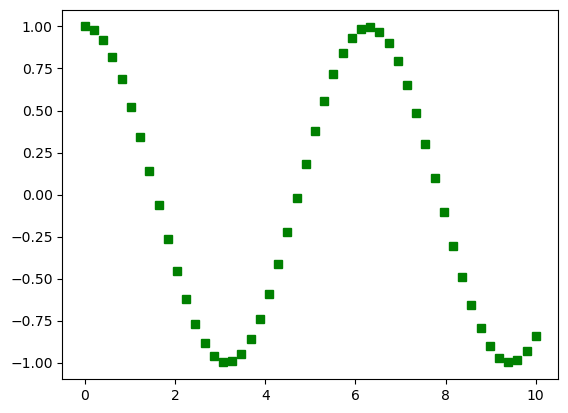

In [3]:
plt.plot(x, y, 'gs') # 'gs': green square
plt.show()

## Saving images to file

- Use, e.g., `pyplot.savefig()`
- File format is determined from the filename extension you supply
- Commonly supports: `.png`, `.jpg`, `.pdf`, `.ps`
- Other options to control, e.g., resolution


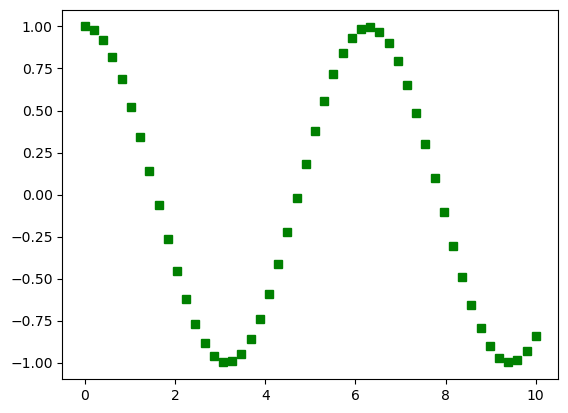

In [4]:
plt.plot(x, y, 'gs')
plt.savefig("cos_gs_plot.png")

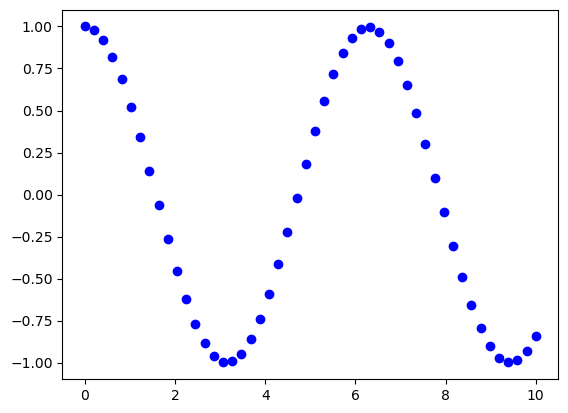

In [5]:
# Save image to file in different formats & options
plt.plot(x, y, 'bo')
plt.savefig("cos_plot_bc.pdf")
plt.savefig("cos_plot.png", dpi=300)
plt.show()

## Note

`matplotlib` is a very large package, an has a great many objects and methods (functions). This can be confusing.

Make sure you are looking at documentation for `matplotlib.pyplot`

<https://matplotlib.org/stable/api/pyplot_summary.html>

Can help to use fully qualified names:

```python
import matplotlib
import matplotlib.pyplot

...
matplotlib.pyplot.plot(x, y, 'rv')
```
to make sure you are getting the right methods.

## Plot data from a file

### Step 0

Download two associated data files `random1.dat` and `random2.dat` from our GitHub repo.

In [6]:
!wget https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/random1.dat
!wget https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/random2.dat

--2023-04-26 11:14:11--  https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/random1.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3300 (3.2K) [text/plain]
Saving to: ‘random1.dat.2’

random1.dat.2       100%[===================>]   3.22K  --.-KB/s    in 0s      

2023-04-26 11:14:11 (71.2 MB/s) - ‘random1.dat.2’ saved [3300/3300]

--2023-04-26 11:14:11--  https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/random2.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330

### Step 1

Read in the data from the files using `numpy.genfromtxt()`. You should have two arrays, e.g., `data1` and `data2`. The files contain pairs of values which we will interpret as x and y coordinates. Check what these data look like (that is, check the attributes of the resulting `numpy` arrays).

In [7]:
data1 = np.genfromtxt("random1.dat")
data2 = np.genfromtxt("random2.dat")

In [8]:
print (data1.shape)
print (data2.shape)

(150, 2)
(150, 2)


### Step 2

Plot `data1` using matplotlib to appear as red crosses (check the online documentation for `pyplot.plot`). You will need x-coordinates `data1[:,0]` and the corresponding y-coordinates

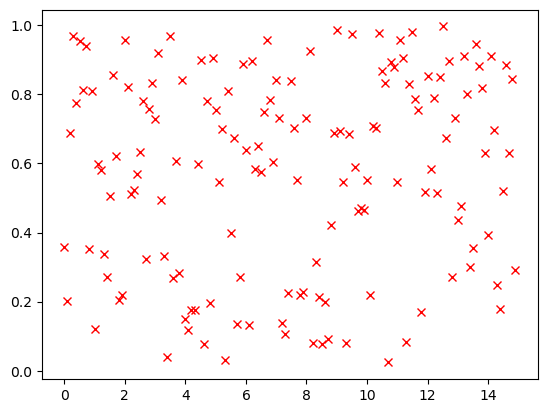

In [9]:
plt.plot(data1[:,0], data1[:,1], "rx")
plt.show()

### Step 3

Now plot `data2` to appear a green circles connected by a line.

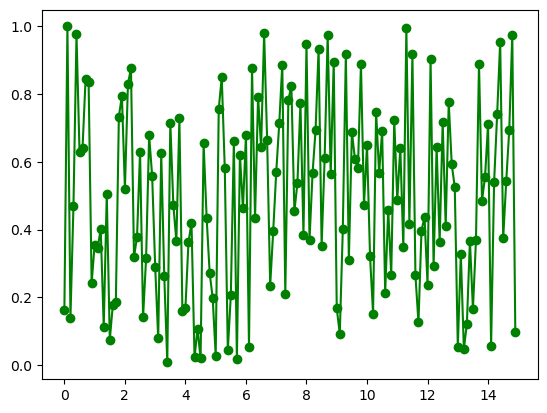

In [10]:
plt.plot(data2[:,0], data2[:,1], "go-")
plt.show()

### Step 4
1. How do we show `data1` and `data2` on the same plot?
2. Can you find out how to add labels to the axes?
3. Can you add a legend?

Hint: you need something like `plot(x, y, '+', label = "text")` for the legend

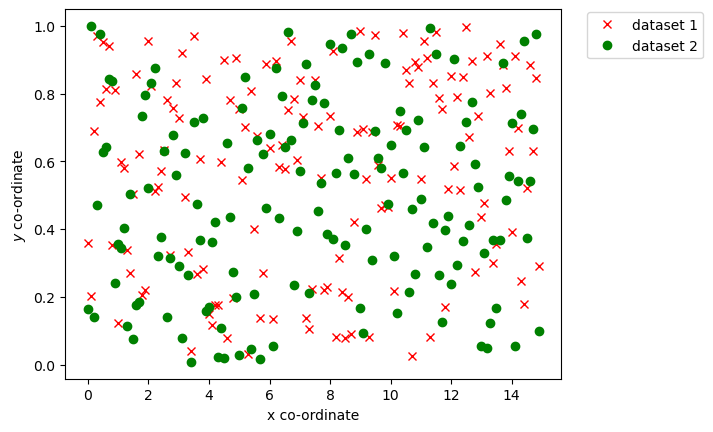

In [11]:
plt.plot(data1[:,0], data1[:,1], 'rx', label = "dataset 1")
plt.plot(data2[:,0], data2[:,1], 'go', label = "dataset 2")
plt.xlabel("x co-ordinate")
plt.ylabel(r"$y$ co-ordinate") # add the r'text' transform the text into LaTeX text. It is useful for math.
plt.legend(loc = "upper right", bbox_to_anchor=(1.3, 1.01))
plt.show()


## Customisation

There are many ways to customise a plot. These may involve interaction with other `matplotlib` objects.

### Figure size

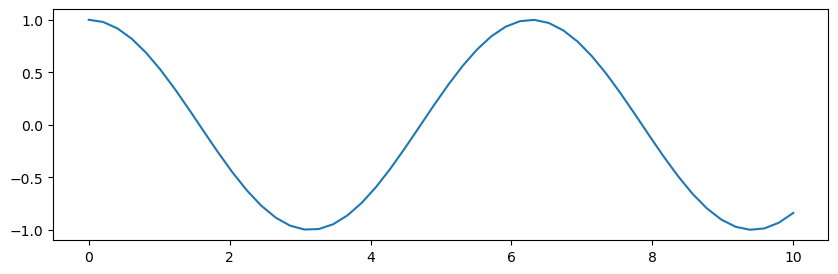

In [12]:
# Set the figure size and add a plot
# The figure size (in inches) can be specified
fig = plt.figure(figsize=(10,3))
plt.plot(x, y)
plt.show()

### Lines

[documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)

|linestyle                  | description      |
|-------------------------- |----------------- |
|'-' or 'solid'             | solid line       |
|'--' or 'dashed'           | dashed line      |
|'-.' or 'dashdot'          | dash-dotted line |
|':' or 'dotted'            | dotted line      |
|'none', 'None', ' ', or '' | draw nothing     |

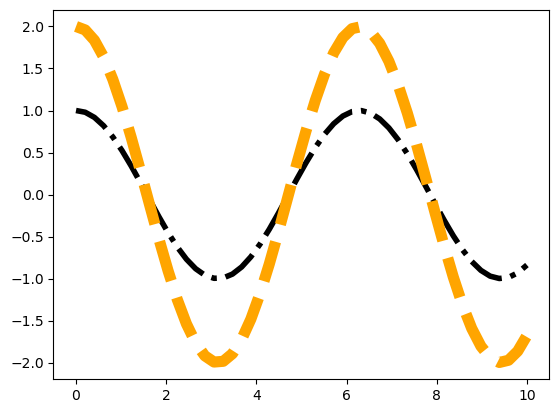

In [13]:
# The linewidth, and linestyle can be changed.
# Note that for standard colours, you can define with the linestyle
plt.plot(x, y, 'k-.', linewidth=4.0)

# you can specify the color name uder "color=" or "c="
# you can use "lw=" instead "linewidth="
plt.plot(x, y*2, '--', c="orange", lw=8.0)
plt.show()

### Markers

See [`markers`](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)  for full description of possible arguments.

Define a marker and change sizes

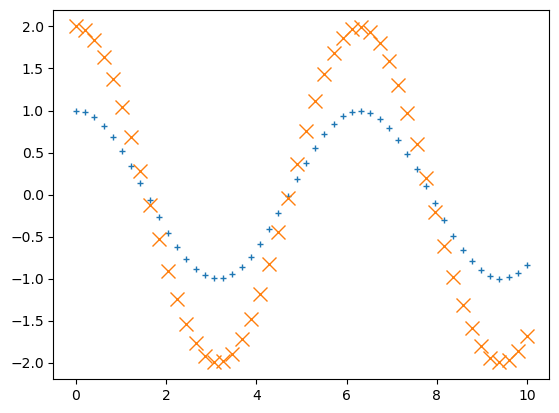

In [14]:
# Markers and their properties can be controlled.
# Unfilled markers: '.',+','x','1' to '4','|'
plt.plot(x,y, '+', markersize=5)
plt.plot(x,2*y, 'x', ms=10)
plt.show()

For a filled marker, change face colour, edge colour, edge width, and size.

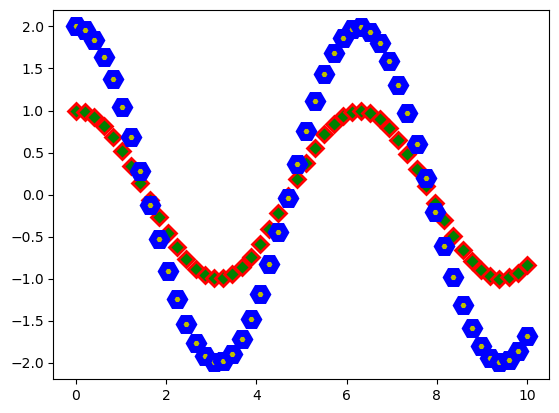

In [15]:
# Filled markers include: 'o', 's','*','d','>','^','v', 'p', 'h'
plt.plot(x, y, "D", markerfacecolor = 'g', markeredgecolor = 'r',markersize=8, markeredgewidth=2)

# you can use short for most attributes
plt.plot(x, y*2, "H", mfc = 'y', mec = 'b',ms=10, mew=5)
plt.show()

Combine marker and lines

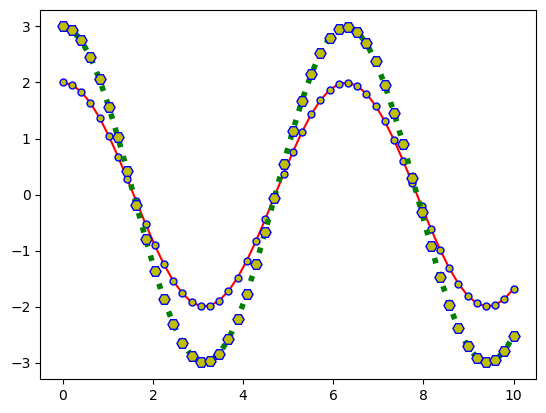

In [16]:
plt.plot(x, y*2, "o-r", mfc = 'y', mec = 'b',ms=5, mew=1)
plt.plot(x, y*3, ":", lw=4, c="g", marker="H", mfc = 'y', mec = 'b',ms=8, mew=1)
plt.show()

### Axes and labels

Set x-axis and y-axis limits.

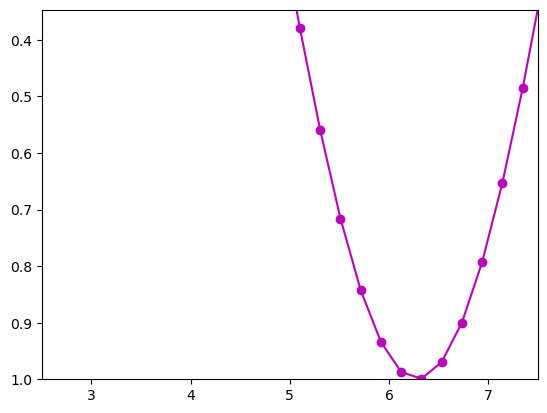

In [17]:
# Set axis limits
plt.plot(x, y, 'mo-')
plt.xlim((xmax*0.25, xmax*0.75))
plt.ylim((np.cos(xmin*0.25), np.cos(xmax*0.75)))
plt.show()

Adjust title.

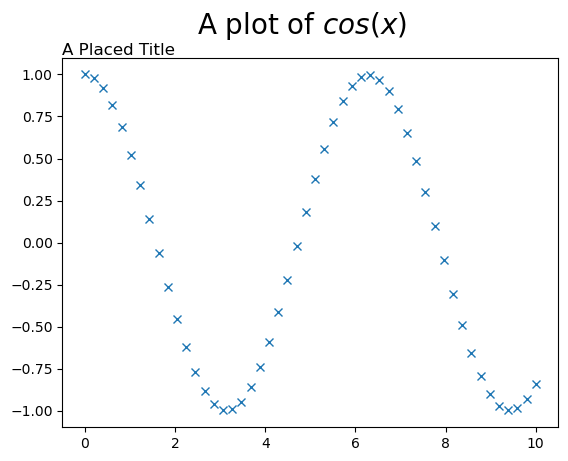

In [18]:
# Set title placement and font properties
plt.plot(x, y, 'x')

plt.suptitle('A plot of $cos(x)$', fontsize = 20)

# Location of the title can be controled via "loc": center, left, right
#"verticalalignment": center, top, bottom, baseline
plt.title('A Placed Title', loc = 'left', verticalalignment = 'top')


plt.show()

### Tickmarks

Add custom tickmarks.

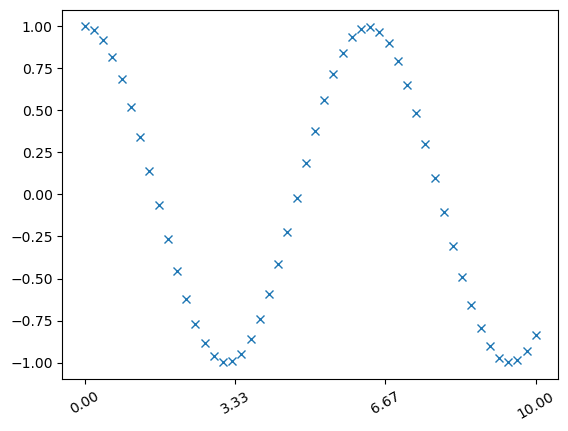

In [19]:
# Tick marks: take the default, or set explicitly
plt.plot(x, y, 'x')

# define new position for the ticks
nticks = 4
tickpos = np.linspace(xmin, xmax, nticks)

# rotate the ticks (degrees)
plt.xticks(tickpos, rotation=30)

plt.show()

([<matplotlib.axis.XTick at 0x7fc23add7790>,
 [Text(0.0, 0, 'A'),
  Text(3.3333333333333335, 0, 'B'),
  Text(6.666666666666667, 0, 'C'),
  Text(10.0, 0, 'D')])

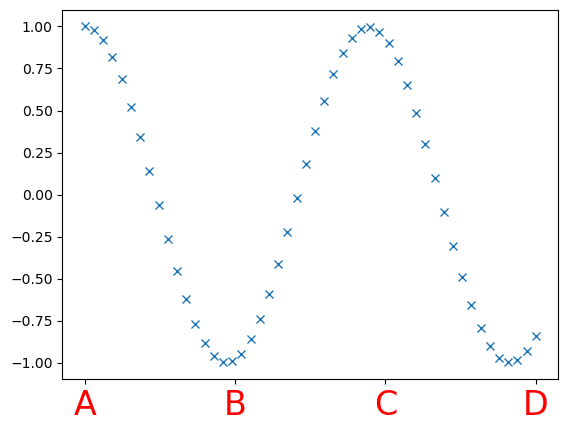

In [20]:
plt.plot(x, y, 'x')

# set arbitrary values
labels = ['A', 'B', 'C', 'D']

# choose a different colour/size
plt.xticks(tickpos, labels, c="red", fontsize=24)


###  Annotations

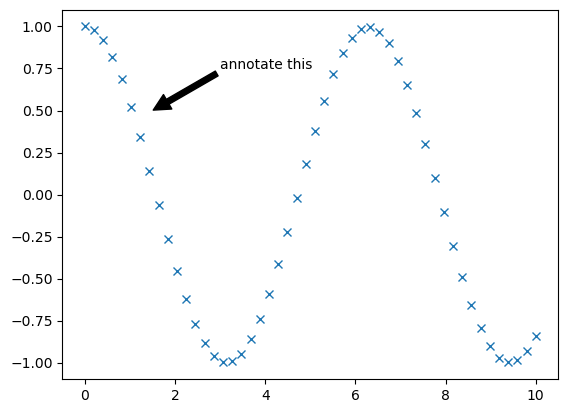

In [21]:
# Arrows and annotations
plt.plot(x, y, 'x')
atext = 'annotate this'
arrowtip = (1.5, 0.5)
textloc=(3, 0.75)
plt.annotate(atext, xy=arrowtip, xytext=textloc,
            arrowprops=dict(facecolor='black', shrink=0.01),)
plt.show()

## Subplots

<img src="subplotgrid.png" style="width: 50%">

* There can be multiple plots, or subplots, within a figure


* Use `subplot()` to place plots on a regular grid

```python
subplot(nrows, ncols,
        plot_number)
```

* Need to control which subplot is used

    * "Current" axes is last created
    * Or use `pyplot.sca(ax)`

Create subplots

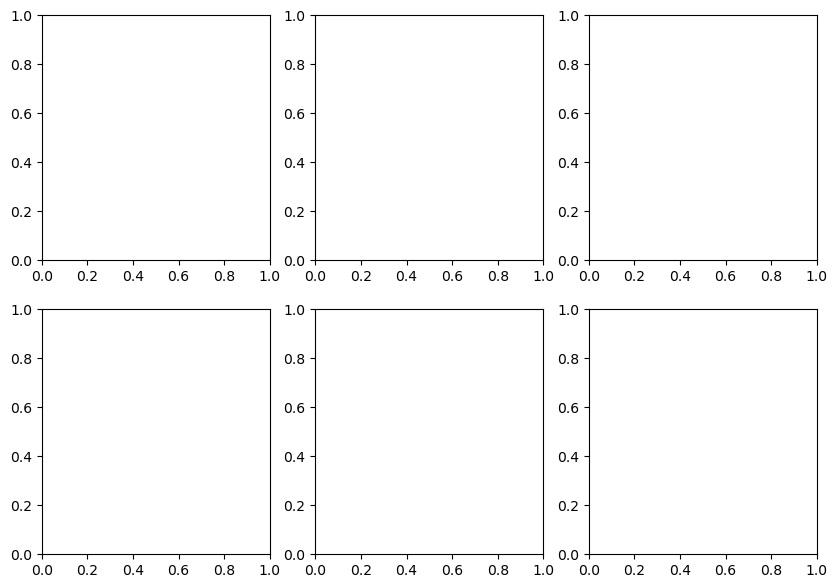

In [22]:
(fig, axes) = plt.subplots(nrows = 2, ncols = 3, figsize=(10,7))

plt.show()

### Axes object

Can move between subplots by keeping a reference to the `axes` array

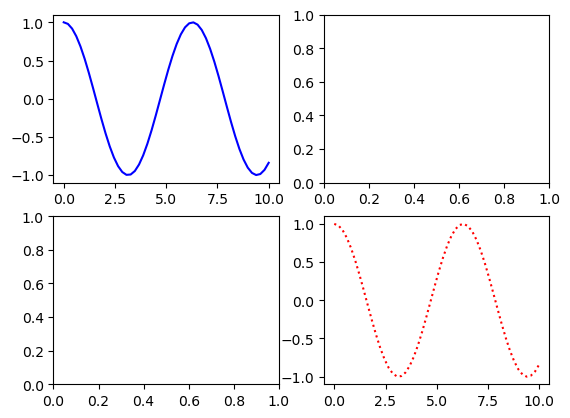

In [23]:
(fig, axes) = plt.subplots(nrows = 2, ncols = 2)

axes[0,0].plot(x, y, 'b-')
axes[1,1].plot(x, y, 'r:')
plt.show()

Configure spaces for better visualisation.

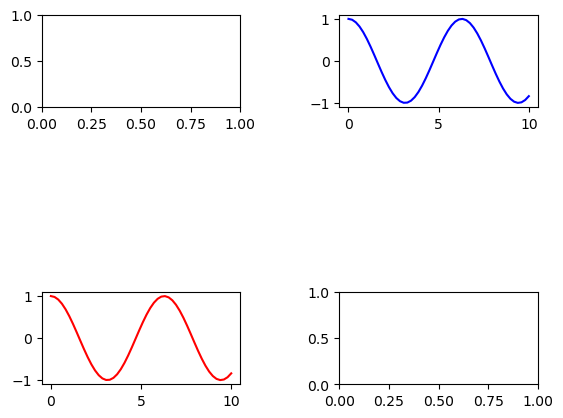

In [24]:
# Space between subplots may be adjusted.
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
(fig, axes) = plt.subplots(nrows = 2, ncols = 2)
plt.subplots_adjust(wspace = 0.5, hspace = 2.0)


axes[0,1].plot(x, y, 'b-')
axes[1,0].plot(x, y, 'r-')
plt.show()

### General subplots using subplot2grid 

<img src="subplot2grid.png" style="width: 50%">

- For more control over subplot layout, use `subplot2grid()`

```python
subplot2grid(shape,
             location,
             rowspan = 1,
             colspan = 1)
```

- Subplots can span more than one row or column

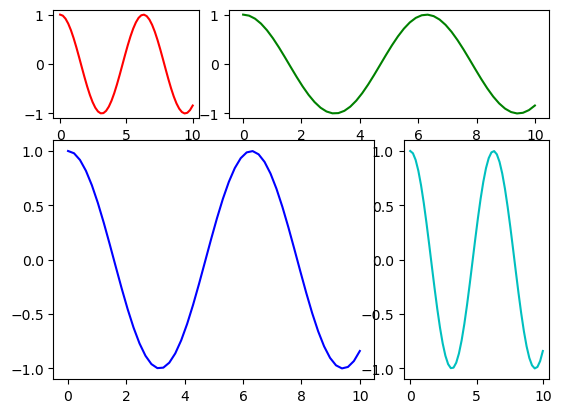

In [25]:
# For example: subplot2grid(shape, loc, rowspan=1, colspan=1)
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax1.plot(x, y, 'r-')
ax2.plot(x, y, 'g-')
ax3.plot(x, y, 'b-')
ax4.plot(x, y, 'c-')
plt.show()

### Example: Three plots

We are now going to try to create a plot, using `subplots()`,  which looks like:

<img src = "exercise2.png">

#### Step 1: Data

You will need three sets of data. 

- For the pie chart you will need to create arrays with the four percentages.
- The two histograms are generated from data in the files `uniform.dat` and `normal.dat` respectively.


In [26]:
#Pie data
pie_labels = ['A', 'B', 'C', 'D']
pie_sizes = [15, 30, 35, 20]

#Histogram 1 data
!wget https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/uniform.dat
data1 = np.genfromtxt('uniform.dat')

#Histogram 2 data
!wget https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/normal.dat
data2 = np.genfromtxt('normal.dat')

--2023-04-26 11:14:14--  https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/uniform.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15000 (15K) [text/plain]
Saving to: ‘uniform.dat.3’

uniform.dat.3       100%[===================>]  14.65K  --.-KB/s    in 0s      

2023-04-26 11:14:14 (32.1 MB/s) - ‘uniform.dat.3’ saved [15000/15000]

--2023-04-26 11:14:15--  https://raw.githubusercontent.com/ARCTraining/swd5_sc_py/main/book/2_matplotlib/normal.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15

#### Step 2: Plotting frame

You will need to create three subplots, the total size of which can be controlled by the setting the size of the *figure* object via

```python
fig.set_size_inches(width, height)
```

Make sure the pie chart appears in the first subplot.

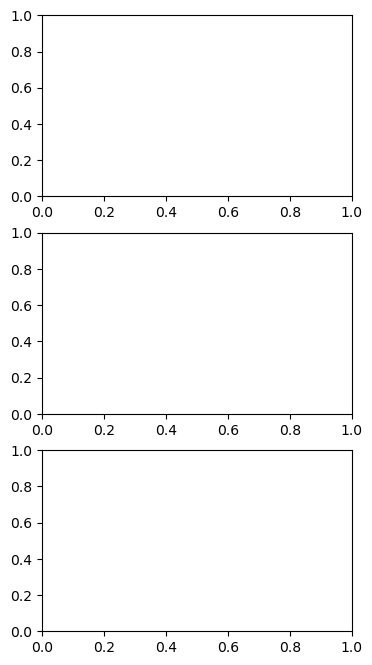

In [27]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(4.0, 8.0)

#### Step 3: Plotting & Customisation

Check the online documentation for the pie chart to see how to produce it

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie

And check the documentation for the histogram at

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

The pie chart colours are:

```python
['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
```

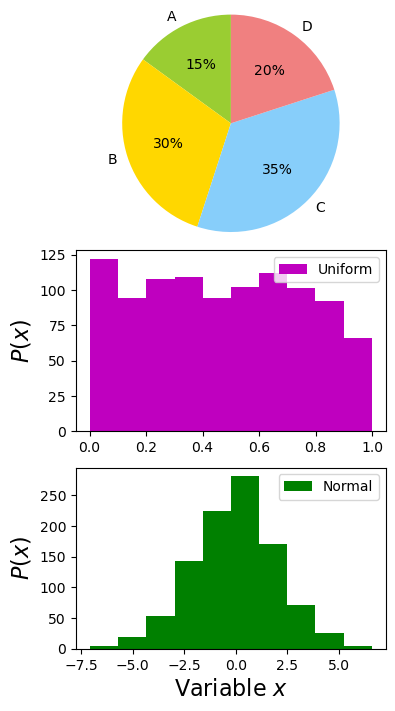

In [28]:
plt.suptitle ("Three plots", fontsize=20)

#Pie chart
pie_colours = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
pie_radius = 1.5
plt.sca(axes[0])
plt.axis('equal')
plt.pie(pie_sizes, labels = pie_labels, colors = pie_colours, 
        radius = pie_radius, startangle = 90, autopct = '%1.0f%%')

#Histogram 1
plt.sca(axes[1])
plt.hist(data1, color ='m', label = 'Uniform')
plt.legend()
plt.ylabel('$P(x)$', size =16)


#Histogram 2
plt.sca(axes[2])
plt.hist(data2, color ='g', label = 'Normal')
plt.legend()
plt.ylabel('$P(x)$', size =16)
plt.xlabel('Variable $x$', size=16)

plt.show()

## Other type of plots & settings

### Check the gallery

<https://matplotlib.org/stable/gallery/index.html>

### Cheatsheets & Handouts

- [Cheatsheets](https://matplotlib.org/cheatsheets/cheatsheets.pdf)
- [Handout beginner](https://matplotlib.org/cheatsheets/handout-beginner.pdf)
- [Handout intermediate](https://matplotlib.org/cheatsheets/handout-intermediate.pdf)
- [Tips](https://matplotlib.org/cheatsheets/handout-tips.pdf)


## Customisation : matplotlibrc settings

- Particular settings for `matplotlib` can be stored in a file called the `matplotlibrc` file

```python
import matplotlib

matplotlib.rc_file("/path/to/my/matplotlibrc")
```

- You would edit the `matplotlibrc` for different journal or presentation styles, for example. You could have a separate `matplotlibrc` for each type of style

See <https://matplotlib.org/stable/tutorials/introductory/customizing.html>

Settings Example

```python
axes.labelsize  : 9.0
xtick.labelsize : 9.0
ytick.labelsize : 9.0
legend.fontsize : 9.0
font.family     : serif  
font.serif      : Computer Modern Roman

# Marker size
lines.markersize  : 3

# Use TeX to format all text (Agg, ps, pdf backends)
text.usetex : True
```


## Summary 

- Builds on `numpy`
- Simple, interactive plotting
- Many examples available online
- Good enough for publication quality images
- Can be customised for different scenarios


## Advanced topic : Matplotlib frontend and backend

Matplotlib consists of two parts, a frontend and a backend:
 
- Frontend : the user facing code i.e the interface
- Backend : does all the hard work behind-the-scenes to render the image
  
There are two types of backend:

- User interface, or *interactive*, backends
- Hardcopy, or *non-interactive*, backends to make image files
- e.g. Agg (png), Cairo (svg), PDF (pdf), PS (eps, ps)

  
Check which backend is being used with 

```python
matplotlib.get_backend()
```

- Switch to a different backend (*before* importing `pyplot`) with
  
```python
matplotlib.use(...)
import matplot.pyplot as plt
...
```

For more information:

https://matplotlib.org/stable/users/explain/backends.html#backends